<a href="https://colab.research.google.com/github/dharunS05/Python/blob/main/Project_7_Used_car_price_prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Car Price Prediction  Using Regression model


---

Dataset = https://www.kaggle.com/code/suleymanertekin/used-cars-price-prediction

importing the dependencies

In [34]:
import pandas as pd
import numpy as np
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Lasso
from sklearn.metrics import mean_squared_error,r2_score


Loading the Used car Dataset

In [35]:
#loading Dataset
car_dataset = pd.read_csv('/content/car data.csv')
print("Dataset loaded")

Dataset loaded


In [36]:
#check the shape of dataset
car_dataset.shape

(301, 9)

In [37]:
#first five data in the car dataset
car_dataset.head()

,Car_Name,Year,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner
0,ritz,2014,3.35,5.59,27000,Petrol,Dealer,Manual,0
1,sx4,2013,4.75,9.54,43000,Diesel,Dealer,Manual,0
2,ciaz,2017,7.25,9.85,6900,Petrol,Dealer,Manual,0
3,wagon r,2011,2.85,4.15,5200,Petrol,Dealer,Manual,0
4,swift,2014,4.60,6.87,42450,Diesel,Dealer,Manual,0


In [38]:
#counting missing values
print(car_dataset.isnull().sum())

Car_Name         0
Year             0
Selling_Price    0
Present_Price    0
Kms_Driven       0
Fuel_Type        0
Seller_Type      0
Transmission     0
Owner            0
dtype: int64


In [39]:
#check categorical data  counts

category_data = ['Fuel_Type','Seller_Type','Transmission','Owner']
for i in category_data:
  print(car_dataset[i].value_counts())
  print()

Fuel_Type
Petrol    239
Diesel     60
CNG         2
Name: count, dtype: int64

Seller_Type
Dealer        195
Individual    106
Name: count, dtype: int64

Transmission
Manual       261
Automatic     40
Name: count, dtype: int64

Owner
0    290
1     10
3      1
Name: count, dtype: int64



Data Analyse and Visualization

<Axes: xlabel='Year', ylabel='Present_Price'>

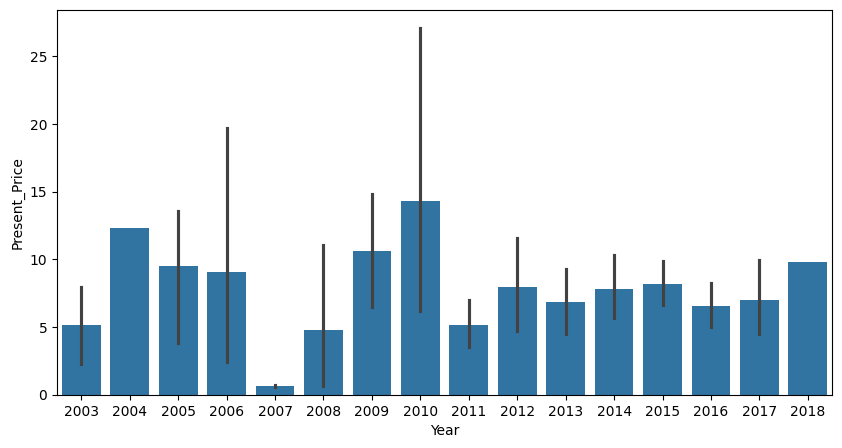

In [40]:
#car year vs Price
import matplotlib.pyplot as plt

plot = plt.figure(figsize=(10,5))
sns.barplot(x='Year',y='Present_Price',data=car_dataset)

<Axes: xlabel='Selling_Price', ylabel='Count'>

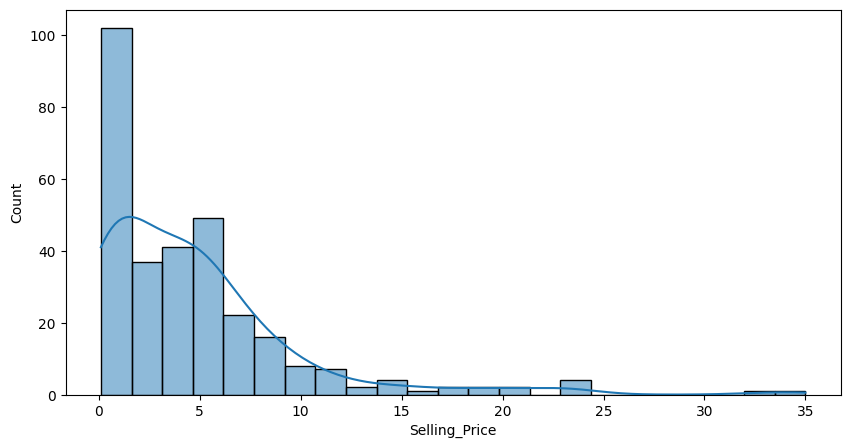

In [41]:
#car selling price
plot = plt.figure(figsize=(10,5))
sns.histplot(car_dataset,x='Selling_Price',kde=True)

<Axes: xlabel='Kms_Driven', ylabel='Count'>

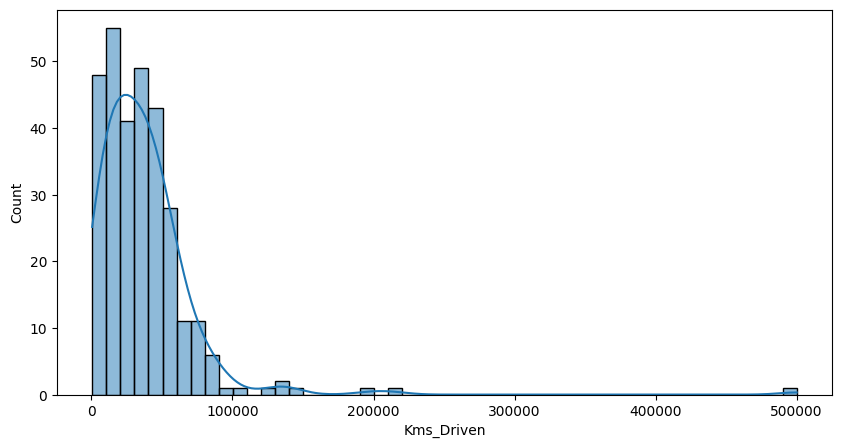

In [42]:
#car km
plot = plt.figure(figsize=(10,5))
sns.histplot(car_dataset,x='Kms_Driven',kde=True)

Preprocessing



---
convert catagorical data to Numeric features


In [43]:
car_dataset.head()

,Car_Name,Year,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner
0,ritz,2014,3.35,5.59,27000,Petrol,Dealer,Manual,0
1,sx4,2013,4.75,9.54,43000,Diesel,Dealer,Manual,0
2,ciaz,2017,7.25,9.85,6900,Petrol,Dealer,Manual,0
3,wagon r,2011,2.85,4.15,5200,Petrol,Dealer,Manual,0
4,swift,2014,4.60,6.87,42450,Diesel,Dealer,Manual,0


Labeling datas

0 - Dealer
1- Individual


---



Fuel Type :
0 - Petrol
1 - Diesel
2 - CNG


---



Transmission :
0 - Manual
1 - Automatic

In [44]:
#convert Seller Type
car_dataset['Seller_Type']= car_dataset['Seller_Type'].map({'Dealer': 0, 'Individual':1})
car_dataset['Fuel_Type']=car_dataset['Fuel_Type'].map({'Petrol':0,'Diesel':1,'CNG':2})
car_dataset['Transmission']=car_dataset['Transmission'].map({'Manual':0,'Automatic':1})

In [45]:
car_dataset.head()

,Car_Name,Year,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner
0,ritz,2014,3.35,5.59,27000,0,0,0,0
1,sx4,2013,4.75,9.54,43000,1,0,0,0
2,ciaz,2017,7.25,9.85,6900,0,0,0,0
3,wagon r,2011,2.85,4.15,5200,0,0,0,0
4,swift,2014,4.60,6.87,42450,1,0,0,0


In [46]:
#check the Distribution
category_data = ['Fuel_Type','Seller_Type','Transmission','Owner']
for i in category_data:
  print(car_dataset[i].value_counts())
  print()

Fuel_Type
0    239
1     60
2      2
Name: count, dtype: int64

Seller_Type
0    195
1    106
Name: count, dtype: int64

Transmission
0    261
1     40
Name: count, dtype: int64

Owner
0    290
1     10
3      1
Name: count, dtype: int64



Seperate Features and label

In [47]:
X = car_dataset.drop(['Car_Name','Selling_Price'],axis = 1)
Y = car_dataset['Selling_Price']
print(X)
print(Y)

     Year  Present_Price  Kms_Driven  ...  Seller_Type  Transmission  Owner
0    2014           5.59       27000  ...            0             0      0
1    2013           9.54       43000  ...            0             0      0
2    2017           9.85        6900  ...            0             0      0
3    2011           4.15        5200  ...            0             0      0
4    2014           6.87       42450  ...            0             0      0
..    ...            ...         ...  ...          ...           ...    ...
296  2016          11.60       33988  ...            0             0      0
297  2015           5.90       60000  ...            0             0      0
298  2009          11.00       87934  ...            0             0      0
299  2017          12.50        9000  ...            0             0      0
300  2016           5.90        5464  ...            0             0      0

[301 rows x 7 columns]
0       3.35
1       4.75
2       7.25
3       2.85
4       4.60

spliting Training and Test Data

In [48]:
X_train,X_test,Y_train,Y_test = train_test_split(X,Y,test_size=0.1,random_state=2)

In [49]:
#shape of Training and Test Data
print(X.shape,X_train.shape,X_test.shape)

(301, 7) (270, 7) (31, 7)


Model Deploy - Linear Regression Model

In [50]:
#Model deploying
regression = LinearRegression()

In [51]:
#Model Fitting
regression.fit(X_train,Y_train)

LinearRegression()



---



Model Evaluation

In [54]:
#training data Evaluation
training_data_prediction = regression.predict(X_train)
training_data_r2 = r2_score(Y_train,training_data_prediction)
print("R Squared Error : ",training_data_r2)
training_data_mse = mean_squared_error(Y_train,training_data_prediction)
print("Mean Squared Error: ",training_data_mse)

R Squared Error :  0.8799451660493711
Mean Squared Error:  3.2590308233090868


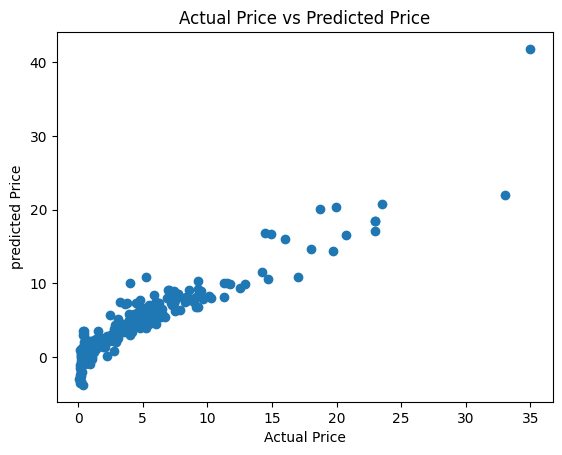

In [61]:
#scatterplot the prediction
plt.scatter(Y_train,training_data_prediction)
plt.xlabel('Actual Price')
plt.ylabel('predicted Price')
plt.title('Actual Price vs Predicted Price')
plt.show()

In [55]:
#test data Evaluation
test_data_prediction = regression.predict(X_test)
test_data_r2 = r2_score(Y_test,test_data_prediction)
print("R Squared Error : ",test_data_r2)
test_data_mse = mean_squared_error(Y_test,test_data_prediction)
print("Mean Squared Error: ",test_data_mse)

R Squared Error :  0.8365766715027051
Mean Squared Error:  2.1501299189836294


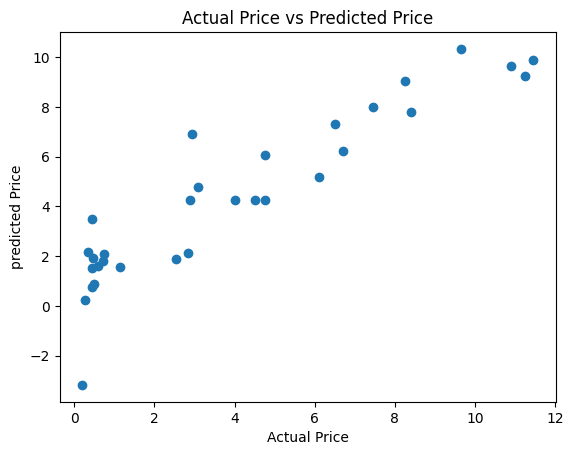

In [62]:
#scatterplot the prediction
plt.scatter(Y_test,test_data_prediction)
plt.xlabel('Actual Price')
plt.ylabel('predicted Price')
plt.title('Actual Price vs Predicted Price')
plt.show()



---



Model Prediction

In [58]:
#prediction
n = 3
input_data = X_test.iloc[n]
prediction = regression.predict([input_data])
print(prediction)
print(Y_test[n])

[4.78985002]
2.85


/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(




---



Random Forest Regression

In [63]:
from sklearn.ensemble import RandomForestRegressor

In [64]:
random_regressor = RandomForestRegressor(n_estimators=100)

In [66]:
random_regressor.fit(X_train, Y_train)

RandomForestRegressor()

In [67]:
#training data Evaluation
training_data_prediction = random_regressor.predict(X_train)
training_data_r2 = r2_score(Y_train,training_data_prediction)
print("R Squared Error : ",training_data_r2)
training_data_mse = mean_squared_error(Y_train,training_data_prediction)
print("Mean Squared Error: ",training_data_mse)

R Squared Error :  0.9868370363488863
Mean Squared Error:  0.35732425637037013


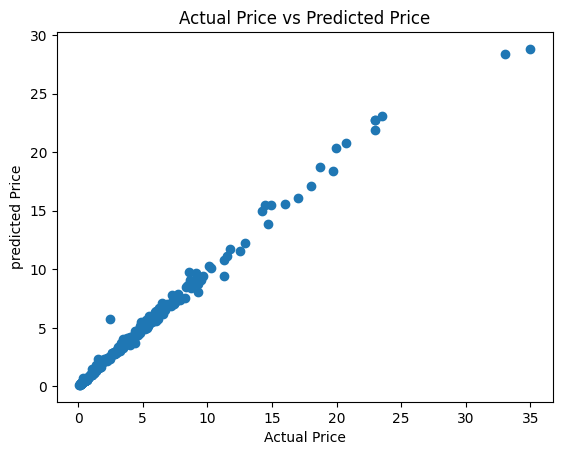

In [68]:
#scatterplot the prediction
plt.scatter(Y_train,training_data_prediction)
plt.xlabel('Actual Price')
plt.ylabel('predicted Price')
plt.title('Actual Price vs Predicted Price')
plt.show()

In [72]:
#test data Evaluation
test_data_prediction = random_regressor.predict(X_test)
test_data_r2 = r2_score(Y_test,test_data_prediction)
print("R Squared Error : ",test_data_r2)
test_data_mse = mean_squared_error(Y_test,test_data_prediction)
print("Mean Squared Error: ",test_data_mse)

R Squared Error :  0.9784398941510439
Mean Squared Error:  0.2836622474193557


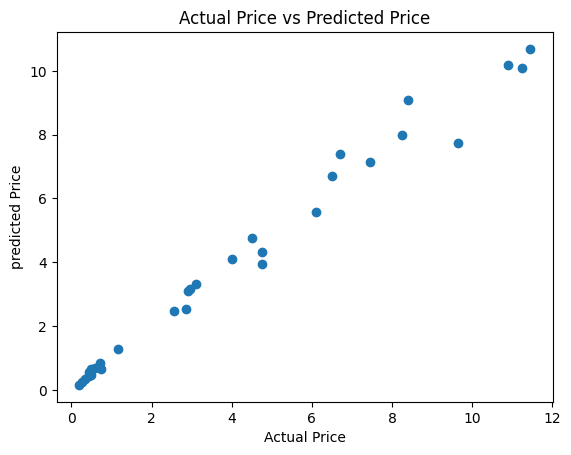

In [73]:
#scatterplot the prediction
plt.scatter(Y_test,test_data_prediction)
plt.xlabel('Actual Price')
plt.ylabel('predicted Price')
plt.title('Actual Price vs Predicted Price')
plt.show()

In [77]:
#prediction
n = 5
input_data = X_test.iloc[n]
prediction = regression.predict([input_data])
print(prediction)
print(Y_test.iloc[n])

[4.24823193]
4.5


/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(
